# Model V1

In [1]:
import os
import pathlib
import tensorflow as tf
import pandas as pd
from dotenv import load_dotenv
import wandb

from bcd.model.factory import ModelFactoryV1
from bcd.model.experiment import Experiment
from bcd.model.repo import ModelRepo
pd.set_option('display.max_rows',999)
load_dotenv()

True

## Configuration

In [2]:
# Experiment Parameters
%env "WANDB_NOTEBOOK_NAME" "01_model_V1.ipynb"
full_dataset = False
project = "BCD_V1_CBIS-DDSM" if full_dataset else "BCD_V1_CBIS-DDSM-10" 

# Model Parameters
force = True  # Whether to retrain if the model and weights already exist from a prior training session.
metrics = ['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
loss = "binary_crossentropy"
activation = "sigmoid"
epochs = 100
learning_rate = 1e-4
num_classes = 2

# Dataset params
dataset = "CBIS-DDSM" if full_dataset else "CBIS-DDSM-10"
batch_size = 64 if full_dataset else 32
input_shape = (224,224,3)
output_shape = 1
train_dir = pathlib.Path("data/image/1_final/training/training/").with_suffix('') if full_dataset else pathlib.Path("data/image/1_final/training_10/training/").with_suffix('') 
test_dir = pathlib.Path("data/image/1_final/test/test/").with_suffix('')

# Early stop parameters 
es_min_delta = 0.0001
es_monitor = "val_loss"  # Monitor validation loss for early stopping
es_patience = 10  # The number of epochs for which lack of improvement is tolerated 
es_restore_best_weights = True  # Returns the best weights rather than the weights at the last epoch.
es_verbose = 1

# Reduce LR on Plateau Parameters
rlr_monitor = "val_loss"
rlr_factor = 0.5
rlr_patience = 3
rlr_verbose = 1
rlr_mode = "auto"
rlr_min_delta = 1e-4
rlr_min_lr=1e-10



env: "WANDB_NOTEBOOK_NAME"="01_model_V1.ipynb"


## Experiment Config

In [3]:
config = {
    "project": project,        
    "dataset": dataset,
    "run_name": None,
    "num_classes": num_classes,
    "batch_size": batch_size,
    "epochs": epochs,    
    "learning_rate": learning_rate,
    "loss": loss,    
    "early_stop_min_delta": es_min_delta,
    "early_stop_monitor": es_monitor,
    "early_stop_patience": es_patience,
    "early_stop_restore_best_weights": es_restore_best_weights,
    "early_stop_verbose": es_verbose,
    "rlr_monitor": rlr_monitor,
    "rlr_factor": rlr_factor,
    "rlr_patience": rlr_patience,
    "rlr_verbose": rlr_verbose,
    "rlr_mode": rlr_mode,
    "rlr_min_delta": rlr_min_delta,
    "rlr_min_lr": rlr_min_lr
    
}

## Load Data

In [4]:
# Training DataSet (10%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    color_mode="rgb",
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    seed=123,
    batch_size=batch_size)

# Validation DataSet (10%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    color_mode="rgb",
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    seed=123,
    batch_size=batch_size)

# Test Set
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    color_mode="rgb",
    image_size=(224,224),
    shuffle=False)

Found 276 files belonging to 2 classes.
Using 221 files for training.
Found 276 files belonging to 2 classes.
Using 55 files for validation.
Found 649 files belonging to 2 classes.


## Callbacks

In [5]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor=es_monitor, 
                                                       min_delta=es_min_delta,
                                                       patience=es_patience, 
                                                       restore_best_weights=es_restore_best_weights,
                                                       verbose=es_verbose)

reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor=rlr_monitor,
                                                          factor=rlr_factor,
                                                          patience=rlr_patience,
                                                          verbose=rlr_verbose,
                                                          mode=rlr_mode,
                                                          min_delta=rlr_min_delta,
                                                          min_lr=rlr_min_lr)
callbacks = [early_stop_callback, reduce_lr_callback]

## Dependencies

In [6]:
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
repo = ModelRepo()
factory = ModelFactoryV1(input_shape=input_shape, output_shape=output_shape, activation=activation)

## DenseNet Experiment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                             

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aistudio. Use `wandb login --relogin` to force relogin


Epoch 1/100
7/7 [==============================] - 63s 6s/step - loss: 0.6928 - accuracy: 0.5566 - auc: 0.5111 - precision: 0.4483 - recall: 0.2826 - val_loss: 0.6315 - val_accuracy: 0.6909 - val_auc: 0.5519 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
7/7 [==============================] - 42s 6s/step - loss: 0.7006 - accuracy: 0.5928 - auc: 0.4619 - precision: 0.5357 - recall: 0.1630 - val_loss: 0.6313 - val_accuracy: 0.6909 - val_auc: 0.5356 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/100
7/7 [==============================] - 41s 6s/step - loss: 0.6596 - accuracy: 0.6244 - auc: 0.6096 - precision: 0.7143 - recall: 0.1630 - val_loss: 0.6415 - val_accuracy: 0.6727 - val_auc: 0.5704 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/100
7/7 [==============================] - 41s 6s/step - loss: 0.6852 - accuracy: 0.5566 - auc: 0.5435 - precision: 0.4625 - recall: 0.4022 - val_loss: 0.6674

wandb: Waiting for artifact run-fqev8k09-DenseNet_V1-CBIS-DDSM-10.keras to be committed...



wandb: Committed artifact aistudio/BCD_V1_CBIS-DDSM-10/run-fqev8k09-DenseNet_V1-CBIS-DDSM-10.keras:v0
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch/accuracy,▁▃▄▁▂▄▅▄▅▆▆▅▆▅█
epoch/auc,▂▁▄▃▄▆▆▅▇▆▇▇▇▇█
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,███████▄▄▄▂▂▂▁▁
epoch/loss,██▆▇▆▅▅▅▃▃▂▃▃▂▁
epoch/lr,████████▄▄▄▂▂▂▁
epoch/precision,▁▃▇▁▂▇▅▄██▇▅▆▅█
epoch/recall,▃▁▁▆▂▁▇▇▄▅▆▆█▇█
epoch/val_accuracy,██▇▁█▄▃▄▆▆▂▃▃▄▄
epoch/val_auc,▃▁▅▆██▇▇█▇▇▆▆▆▆
epoch/val_loss,▃▃▄█▁▅█▂▂▄▃▄▄▄▄


/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.69      1.00      0.82        38
   malignant       0.00      0.00      0.00        17

    accuracy                           0.69        55
   macro avg       0.35      0.50      0.41        55
weighted avg       0.48      0.69      0.56        55



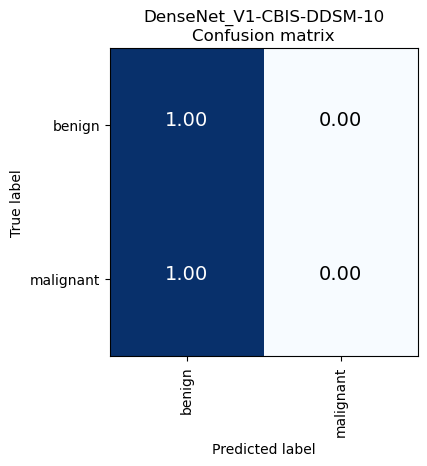

21/21 [==============================] - 91s 4s/step - loss: 0.6788 - accuracy: 0.5978 - auc: 0.5463 - precision: 1.0000 - recall: 0.0114


In [7]:
# Obtain the DenseNet model
densenet = factory.create_densenet()
densenet.summary()

# Create and run the experiment.
config["run_name"] = densenet.alias
densenet_experiment = Experiment(model=densenet, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
densenet_experiment.run(train_ds=train_ds, val_ds=val_ds)
densenet_experiment.classification_report(data=val_ds)
densenet_experiment.plot_confusion_matrix(data=val_ds)

## ResNet Experiment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 resnet152v2 (Functional)    (None, None, None, 2048)  58331648  
                                                             

Epoch 1/100
7/7 [==============================] - 74s 9s/step - loss: 0.7072 - accuracy: 0.5068 - auc: 0.5362 - precision: 0.4314 - recall: 0.1236 - val_loss: 0.6422 - val_accuracy: 0.7091 - val_auc: 0.5658 - val_precision: 0.6667 - val_recall: 0.1176 - lr: 1.2500e-05
Epoch 2/100
7/7 [==============================] - 60s 8s/step - loss: 0.6759 - accuracy: 0.5882 - auc: 0.5709 - precision: 0.5094 - recall: 0.2935 - val_loss: 0.6266 - val_accuracy: 0.6909 - val_auc: 0.5464 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.2500e-05
Epoch 3/100
7/7 [==============================] - 59s 8s/step - loss: 0.6963 - accuracy: 0.5611 - auc: 0.5025 - precision: 0.4242 - recall: 0.1522 - val_loss: 0.6274 - val_accuracy: 0.6909 - val_auc: 0.5789 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.2500e-05
Epoch 4/100
7/7 [==============================] - 57s 8s/step - loss: 0.6920 - accuracy: 0.5792 - auc: 0.5305 - precision: 0.4918 - recall: 0.3261 - val_loss: 0.6385 - val_a

wandb: Waiting for artifact run-r0ri3e2x-ResNet_V1-CBIS-DDSM-10.keras to be committed...



wandb: Committed artifact aistudio/BCD_V1_CBIS-DDSM-10/run-r0ri3e2x-ResNet_V1-CBIS-DDSM-10.keras:v0
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch/accuracy,▁▁▆▆▅▅▆▆▆▆▇▇▆▆▆▆▇▇██▅▅██
epoch/auc,▃▃▄▄▁▁▂▂▄▄▄▄▂▂▅▅▆▆▄▄▃▃██
epoch/epoch,▁▁▂▂▂▂▃▃▄▄▄▄▅▅▅▅▆▆▇▇▇▇██
epoch/learning_rate,████████▄▄▄▄▄▄▂▂▂▂▂▂▁▁▁▁
epoch/loss,██▄▄▇▇▆▆▄▄▄▄▅▅▅▅▂▂▅▅▄▄▁▁
epoch/lr,██████████▄▄▄▄▄▄▂▂▂▂▂▂▁▁
epoch/precision,▁▁▅▅▁▁▄▄▅▅▇▇▅▅▄▄▆▆██▂▂██
epoch/recall,▁▁▆▆▂▂▇▇▇▇▆▆▄▄▇▇██▆▆▄▄▅▅
epoch/val_accuracy,██▁▁▁▁▁▁████████████████
epoch/val_auc,▄▄▁▁▅▅▆▆▇▇▇▇▇▇██████████
epoch/val_loss,██▁▁▁▁▆▆▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁


/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.69      1.00      0.82        38
   malignant       0.00      0.00      0.00        17

    accuracy                           0.69        55
   macro avg       0.35      0.50      0.41        55
weighted avg       0.48      0.69      0.56        55



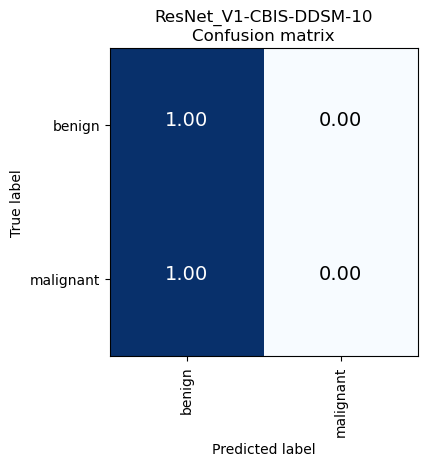

21/21 [==============================] - 129s 6s/step - loss: 0.6839 - accuracy: 0.5917 - auc: 0.5100 - precision: 0.4000 - recall: 0.0076


In [8]:
# Obtain the ResNet model
resnet = factory.create_resnet()
resnet.summary()

# Create and run the experiment.
config["run_name"] = resnet.alias
resnet_experiment = Experiment(model=resnet, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
resnet_experiment.run(train_ds=train_ds, val_ds=val_ds)
resnet_experiment.classification_report(data=val_ds)
resnet_experiment.plot_confusion_matrix(data=val_ds)

## Inception Experiment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                             

Epoch 1/100
7/7 [==============================] - 25s 2s/step - loss: 0.8369 - accuracy: 0.4072 - auc: 0.5116 - precision: 0.4091 - recall: 0.2528 - val_loss: 0.8178 - val_accuracy: 0.3273 - val_auc: 0.3971 - val_precision: 0.3148 - val_recall: 1.0000 - lr: 1.5625e-06
Epoch 2/100
7/7 [==============================] - 19s 2s/step - loss: 0.8034 - accuracy: 0.4344 - auc: 0.5101 - precision: 0.4154 - recall: 0.8804 - val_loss: 0.7606 - val_accuracy: 0.3455 - val_auc: 0.3746 - val_precision: 0.3208 - val_recall: 1.0000 - lr: 1.5625e-06
Epoch 3/100
7/7 [==============================] - 21s 3s/step - loss: 0.7512 - accuracy: 0.4615 - auc: 0.5359 - precision: 0.4237 - recall: 0.8152 - val_loss: 0.7225 - val_accuracy: 0.3091 - val_auc: 0.3622 - val_precision: 0.2439 - val_recall: 0.5882 - lr: 1.5625e-06
Epoch 4/100
7/7 [==============================] - 19s 2s/step - loss: 0.7425 - accuracy: 0.4977 - auc: 0.5233 - precision: 0.4395 - recall: 0.7500 - val_loss: 0.6936 - val_accuracy: 0.4727 

wandb: Waiting for artifact run-87lez9p0-Inception_V1-CBIS-DDSM-10.keras to be committed...



wandb: Committed artifact aistudio/BCD_V1_CBIS-DDSM-10/run-87lez9p0-Inception_V1-CBIS-DDSM-10.keras:v0
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch/accuracy,▁▂▃▄▄▄▄▆▅▅▅▄▆▆▅▅▆▆▇▆▆▅▆▆▆▅▆▆▇▅██▇▆▇▅▆▅▆▆
epoch/auc,▅▅▆▅▄▆▃▆▄▅▅▁▅█▄▄▄▄█▅▄▅▄▃█▅▆▄█▃▇▆▅▇▇▄▆▆▅█
epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,████████████████████████████████▄▄▄▂▂▂▁▁
epoch/loss,█▇▄▄▃▂▃▂▃▂▃▃▂▁▂▃▃▂▁▂▂▂▃▂▁▃▂▂▁▂▁▂▂▁▁▃▂▂▂▁
epoch/lr,█████████████████████████████████▄▄▄▂▂▂▁
epoch/precision,▃▃▃▄▃▃▃▄▃▄▃▂▄▃▃▃▄▃▅▃▄▃▃▄▅▂▄▄▆▁█▇▅▄▅▃▄▂▄▄
epoch/recall,▂█▇▇▅▄▄▄▃▃▃▂▂▂▂▃▂▂▃▂▂▂▁▂▂▁▂▂▂▁▂▂▂▂▂▂▂▁▂▂
epoch/val_accuracy,▁▂▁▄▇███████████████████████████████████
epoch/val_auc,▃▂▁▁▂▂▃▃▃▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▆▇▇▇▇███████████
epoch/val_loss,█▆▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.69      1.00      0.82        38
   malignant       0.00      0.00      0.00        17

    accuracy                           0.69        55
   macro avg       0.35      0.50      0.41        55
weighted avg       0.48      0.69      0.56        55



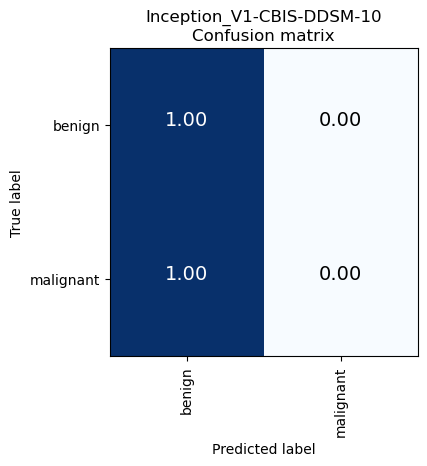

In [9]:
# Obtain the ResNet model
inception = factory.create_inception()
inception.summary()

# Create and run the experiment.
config["run_name"] = inception.alias
inception_experiment = Experiment(model=inception, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
inception_experiment.run(train_ds=train_ds, val_ds=val_ds)
inception_experiment.classification_report(data=val_ds)
inception_experiment.plot_confusion_matrix(data=val_ds)


## EfficientNet Experiment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetv2-s (Functiona  (None, None, None, 1280)  20331360 
 l)                                                              
                                                                 
 efficientnet_global_average  (None, 1280)             0         
 _pooling (GlobalAveragePool                                     
 ing2D)                                                          
                                                                 
 efficientnet_dense_1 (Dense  (None, 1024)             131174

Epoch 1/100
7/7 [==============================] - 45s 4s/step - loss: 0.6884 - accuracy: 0.5611 - auc: 0.5043 - precision: 0.3333 - recall: 0.0459 - val_loss: 0.6635 - val_accuracy: 0.6909 - val_auc: 0.5163 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.9531e-07
Epoch 2/100
7/7 [==============================] - 25s 3s/step - loss: 0.6815 - accuracy: 0.5792 - auc: 0.5176 - precision: 0.4615 - recall: 0.0652 - val_loss: 0.6636 - val_accuracy: 0.6909 - val_auc: 0.5155 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.9531e-07
Epoch 3/100
7/7 [==============================] - 26s 3s/step - loss: 0.6838 - accuracy: 0.5385 - auc: 0.5098 - precision: 0.2727 - recall: 0.0652 - val_loss: 0.6633 - val_accuracy: 0.6909 - val_auc: 0.5178 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.9531e-07
Epoch 4/100
7/7 [==============================] - 26s 3s/step - loss: 0.6759 - accuracy: 0.5973 - auc: 0.5597 - precision: 0.6667 - recall: 0.0652 - val_loss: 0.6634

wandb: Waiting for artifact run-dez4la93-EfficientNet_V1-CBIS-DDSM-10.keras to be committed...



wandb: Committed artifact aistudio/BCD_V1_CBIS-DDSM-10/run-dez4la93-EfficientNet_V1-CBIS-DDSM-10.keras:v0
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch/accuracy,▃▅▇▅▅▃▄▁▅▃▃▅▅▃▆▅▆▅█▆▅▆▆▄▅▃▄▃▅▃▅▄▅▅▅▅█▆▆▇
epoch/auc,▄▅▇▅▂▂▇▆▄▅▃▅▄▁▄▅▃▅▅▅▇▅▃▂█▅▄▃▆▃▄▂▄▆▁▃▅▄▇▃
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
epoch/learning_rate,████████████████████████▄▄▄▄▃▃▂▂▁▁▁▁▁▁▁▁
epoch/loss,▆▄▃▃▆▇▁▄▅▃▆▄▄█▄▅▅▃▃▄▃▃▅▇▁▄▅▆▂▅▄▇▅▃█▅▃▄▁▄
epoch/lr,█████████████████████████▄▄▄▃▃▂▂▁▁▁▁▁▁▁▁
epoch/precision,▃▄▇▄▄▂▄▁▄▂▂▄▄▂▅▅▇▅█▅▅▆▆▄▄▂▃▁▄▂▄▃▄▅▅▄▇▅▅▇
epoch/recall,▄▅▅▆▅▃▆▂▆▂▂▃▅▃█▅▃▆▆▆▄▆▅▄▄▃▃▁▄▂▃▃▄▅▅▃▇▇▅▅
epoch/val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_auc,▃▃▃▁▂▃▄▅▆▇▇▇█▇▅▁▁▃▄▄▃▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
epoch/val_loss,███▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.69      1.00      0.82        38
   malignant       0.00      0.00      0.00        17

    accuracy                           0.69        55
   macro avg       0.35      0.50      0.41        55
weighted avg       0.48      0.69      0.56        55



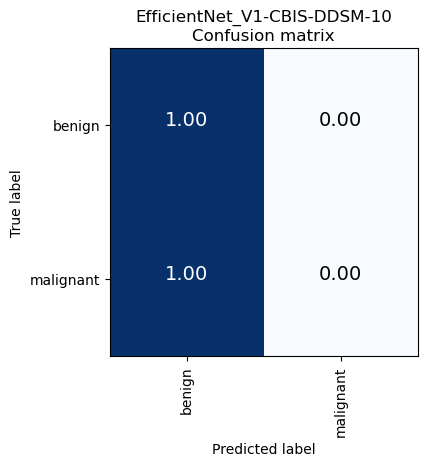

In [10]:
# Obtain the Efficientnet model
efficientnet = factory.create_efficientnet()
efficientnet.summary()

# Create and run the experiment.
config["run_name"] = efficientnet.alias
efficientnet_experiment = Experiment(model=efficientnet, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
efficientnet_experiment.run(train_ds=train_ds, val_ds=val_ds)
efficientnet_experiment.classification_report(data=val_ds)
efficientnet_experiment.plot_confusion_matrix(data=val_ds)


## Inception/Resnet Experiment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                       

Epoch 1/100
7/7 [==============================] - 52s 5s/step - loss: 0.8780 - accuracy: 0.4072 - auc: 0.5018 - precision: 0.4067 - recall: 0.7798 - val_loss: 0.7756 - val_accuracy: 0.3455 - val_auc: 0.4938 - val_precision: 0.3208 - val_recall: 1.0000 - lr: 1.5259e-09
Epoch 2/100
7/7 [==============================] - 33s 4s/step - loss: 0.8814 - accuracy: 0.4163 - auc: 0.4818 - precision: 0.4106 - recall: 0.9239 - val_loss: 0.7755 - val_accuracy: 0.3455 - val_auc: 0.4938 - val_precision: 0.3208 - val_recall: 1.0000 - lr: 1.5259e-09
Epoch 3/100
7/7 [==============================] - 36s 5s/step - loss: 0.8368 - accuracy: 0.4480 - auc: 0.5374 - precision: 0.4250 - recall: 0.9239 - val_loss: 0.7754 - val_accuracy: 0.3455 - val_auc: 0.4954 - val_precision: 0.3208 - val_recall: 1.0000 - lr: 1.5259e-09
Epoch 4/100
7/7 [==============================] - 34s 5s/step - loss: 0.8379 - accuracy: 0.4525 - auc: 0.5288 - precision: 0.4264 - recall: 0.9130 - val_loss: 0.7753 - val_accuracy: 0.3455 

wandb: Waiting for artifact run-165g0vun-InceptionResNet_V1-CBIS-DDSM-10.keras to be committed...



wandb: Committed artifact aistudio/BCD_V1_CBIS-DDSM-10/run-165g0vun-InceptionResNet_V1-CBIS-DDSM-10.keras:v0
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch/accuracy,▃▄█▄█▃▇▁▂▅▆▆▄▅▃▇▆▇▆▄▆▄▃▅▁▁▃▄▆▃▃▆▃▅▄▅▄█▅▅
epoch/auc,▆▅▇▆▆▅▄▄▃▆▅▇▆▅▄▄▃▆█▃▆▄▇▅▃▃▂▆▄▁▆▅▅▇▃▅▅█▃▄
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,████████████████████████████████▄▄▂▂▂▁▁▁
epoch/loss,▅▅▁▂▄▄▅▅▅▂▆▂▃▃▄▃▅▂▁▇▃▄▂▃▅▅▇▄▅█▃▄▆▁▅▄▃▁▆▆
epoch/lr,████████████████████████████████▄▄▄▂▂▁▁▁
epoch/precision,▃▄▇▄▇▂▇▁▃▅▆▆▃▅▂▇▅▇▆▃▅▄▃▅▁▁▃▄▆▃▃▆▃▆▄▅▃█▄▅
epoch/recall,▁▆▆▆▆▅▇▅▆▇▇▇▅▇▅▇▅▇█▄▅▆▇▆▅▅▆▆▇▅▆▇▆█▆▇▄█▅▇
epoch/val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_auc,▁▁▃▃▄▃▂▂▃▃▃▃▃▃▁▂▃▃▂▃▃▃▃▄▇▇▇█████████████
epoch/val_loss,██▇▇▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁


              precision    recall  f1-score   support

      benign       1.00      0.05      0.10        38
   malignant       0.32      1.00      0.49        17

    accuracy                           0.35        55
   macro avg       0.66      0.53      0.29        55
weighted avg       0.79      0.35      0.22        55



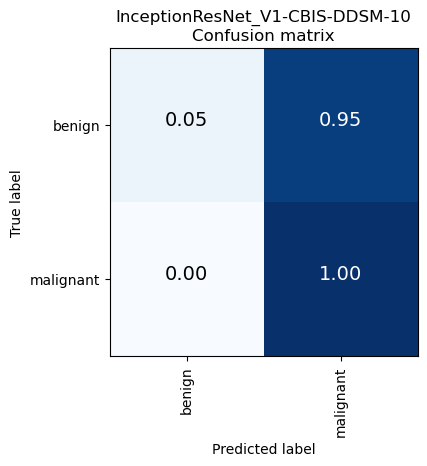

In [11]:
# Obtain the Inception_resnet model
inception_resnet = factory.create_inception_resnet()
inception_resnet.summary()

# Create and run the experiment.
config["run_name"] = inception_resnet.alias
inception_resnet_experiment = Experiment(model=inception_resnet, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
inception_resnet_experiment.run(train_ds=train_ds, val_ds=val_ds)
inception_resnet_experiment.classification_report(data=val_ds)
inception_resnet_experiment.plot_confusion_matrix(data=val_ds)


## MobileNet Experiment

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                      

Epoch 1/100
7/7 [==============================] - 16s 1s/step - loss: 0.7811 - accuracy: 0.4434 - auc: 0.4558 - precision: 0.3958 - recall: 0.8716 - val_loss: 0.7854 - val_accuracy: 0.3091 - val_auc: 0.5248 - val_precision: 0.3091 - val_recall: 1.0000 - lr: 1.0000e-10
Epoch 2/100
7/7 [==============================] - 10s 984ms/step - loss: 0.7691 - accuracy: 0.4299 - auc: 0.4630 - precision: 0.4056 - recall: 0.7935 - val_loss: 0.7854 - val_accuracy: 0.3091 - val_auc: 0.5248 - val_precision: 0.3091 - val_recall: 1.0000 - lr: 1.0000e-10
Epoch 3/100
7/7 [==============================] - 10s 943ms/step - loss: 0.7693 - accuracy: 0.4389 - auc: 0.4836 - precision: 0.4111 - recall: 0.8043 - val_loss: 0.7854 - val_accuracy: 0.3091 - val_auc: 0.5248 - val_precision: 0.3091 - val_recall: 1.0000 - lr: 1.0000e-10
Epoch 4/100
7/7 [==============================] - 9s 929ms/step - loss: 0.7620 - accuracy: 0.4389 - auc: 0.5135 - precision: 0.4101 - recall: 0.7935 - val_loss: 0.7854 - val_accuracy:

wandb: Waiting for artifact run-668us3vn-MobileNet_V1-CBIS-DDSM-10.keras to be committed...



wandb: Committed artifact aistudio/BCD_V1_CBIS-DDSM-10/run-668us3vn-MobileNet_V1-CBIS-DDSM-10.keras:v0
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch/accuracy,▆▆▆▆▅▅▅▅▆▆▆▆▆▆▆▂▂▂▇▇▇▇▅▅▅▅███▆▆▆▆▁▁▁▆▆▆▆
epoch/auc,▁▁▁▁▂▂▂▂▄▄▄████▅▅▅▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▁▁▁▃▃▃▃
epoch/epoch,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇████
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,████▄▄▄▄▄▄▄▁▁▁▁▅▅▅▅▅▅▅████▇▇▇▅▅▅▅▆▆▆▆▆▆▆
epoch/lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/precision,▁▁▁▁▃▃▃▃▅▅▅▄▄▄▄▂▂▂▇▇▇▇▅▅▅▅███▅▅▅▅▁▁▁▅▅▅▅
epoch/recall,▆▆▆▆▁▁▁▁▂▂▂▁▁▁▁▃▃▃████▄▄▄▄▇▇▇▂▂▂▂▂▂▂▂▂▂▂
epoch/val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_auc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_loss,████▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁


/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/envs/bcd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.00      0.00      0.00        38
   malignant       0.31      1.00      0.47        17

    accuracy                           0.31        55
   macro avg       0.15      0.50      0.24        55
weighted avg       0.10      0.31      0.15        55



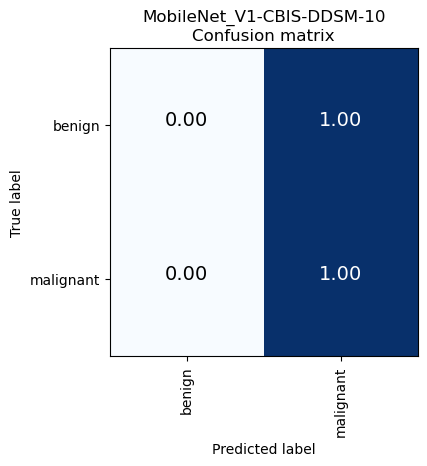

In [12]:
# Obtain the Mobilenet model
mobilenet = factory.create_mobilenet()
mobilenet.summary()

# Create and run the experiment.
config["run_name"] = mobilenet.alias
mobilenet_experiment = Experiment(model=mobilenet, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
mobilenet_experiment.run(train_ds=train_ds, val_ds=val_ds)
mobilenet_experiment.classification_report(data=val_ds)
mobilenet_experiment.plot_confusion_matrix(data=val_ds)


## VGG Experiment

In [7]:
# Obtain the Vgg model
vgg = factory.create_vgg()
vgg.summary()

# Create and run the experiment.
config["run_name"] = vgg.alias
vgg_experiment = Experiment(model=vgg, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
vgg_experiment.run(train_ds=train_ds, val_ds=val_ds)
vgg_experiment.classification_report(data=val_ds)
vgg_experiment.plot_confusion_matrix(data=val_ds)


NameError: name 'factory' is not defined

## Xception Experiment

In [ ]:
# Obtain the Xception model
xception = factory.create_xception()
xception.summary()

# Create and run the experiment.
config["run_name"] = xception.alias
xception_experiment = Experiment(model=xception, config=config, repo=repo, optimizer=optimizer, callbacks=callbacks, metrics=metrics, force=force)
xception_experiment.run(train_ds=train_ds, val_ds=val_ds)
xception_experiment.classification_report(data=val_ds)
xception_experiment.plot_confusion_matrix(data=val_ds)